In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [2]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
# dataset_path = "c:/Users/user/TIL/3-deep-learning/0-example/data/auto-mpg.data"

In [3]:
dataset = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
# 난데이터 모듈 사용하기, 빠르게 처리하기 위해서 그냥 sum() 함
dataset.isna().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [5]:
np.shape(dataset)

(3320, 8)

In [6]:
# 80프로 정도 샘플로 뽑기
# 카테고리 별로 뽑지 않을 수 있음 (특정 성별이 많이 뽑힐 수 있음)
train_dataset = dataset.sample(frac=0.8,random_state=0) 
test_dataset = dataset.drop(train_dataset.index)

In [7]:
train_stats = train_dataset.describe()
train_stats.pop("Age")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Length,2656.0,0.521178,0.121185,0.0750,0.450000,0.54000,0.611250,0.7800
Diameter,2656.0,0.405424,0.100079,0.0550,0.345000,0.42000,0.480000,0.6300
Height,2656.0,0.138481,0.038405,0.0000,0.115000,0.14000,0.165000,0.2500
Whole weight,2656.0,0.818729,0.485549,0.0020,0.436375,0.79025,1.145000,2.7795
Shucked weight,2656.0,0.354794,0.219423,0.0010,0.181375,0.33175,0.503625,1.3485
Viscera weight,2656.0,0.178776,0.108975,0.0005,0.092375,0.16925,0.252000,0.7600
Shell weight,2656.0,0.236472,0.139189,0.0015,0.126000,0.22975,0.323000,1.0050


In [8]:
# .pop('a') => 데이터프레임에서 'a'데이터 삭제
# b = .pop('a') => a칼럼 저장
train_labels = train_dataset.pop('Age')
test_labels = test_dataset.pop('Age')

In [9]:
# 데이터정규화: 데이터의 범위를 일정하게 만들어주기

# 훈련데이터에서 핏
# min-max -> min과 max는 훈련데이터에서 결정
# 스탠다드 -> mean과 std 훈련데이터에서 결정
# 테스트데이터는 적용만 하기. 트랜스폼

# 스탠다드 스케일러
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [10]:
def build_model():
  model = keras.Sequential([
    # 보통 2의 배수
    # 텐서플로우 덴스값이 가장 좋긴 함
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  # 러닝레이트 0.001
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.223380,1.109855,2.223380,5.236210,1.711769,5.236210,995
996,2.218370,1.105637,2.218370,5.030574,1.615327,5.030574,996
997,2.239691,1.112617,2.239691,5.114543,1.615819,5.114543,997
998,2.260808,1.119393,2.260808,5.255404,1.668968,5.255404,998
999,2.234715,1.121537,2.234715,5.291837,1.669781,5.291837,999


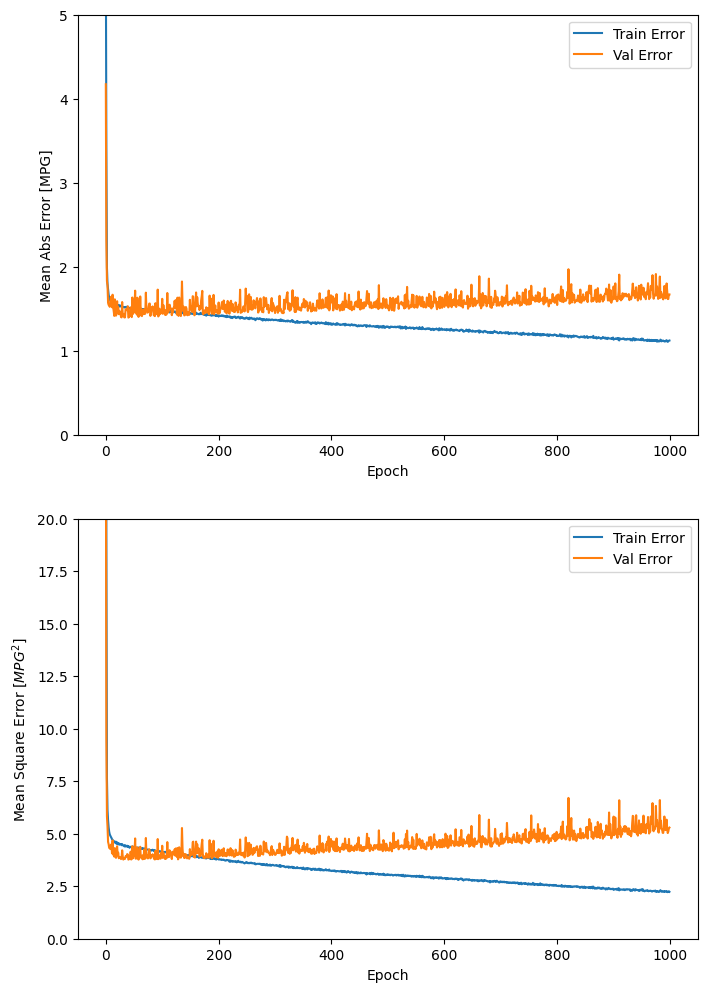

In [15]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


.....................

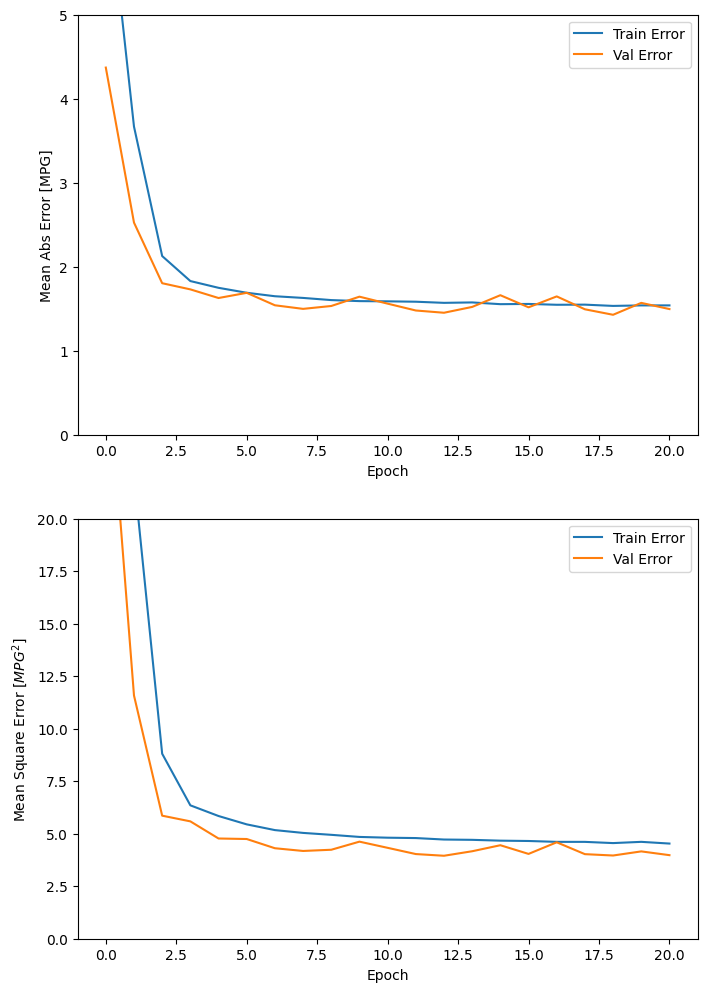

In [42]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [43]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

21/21 - 0s - loss: 13.0249 - mae: 1.6654 - mse: 13.0249 - 23ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차:  1.67 MPG


21/21 [==============================] - 0s 583us/step


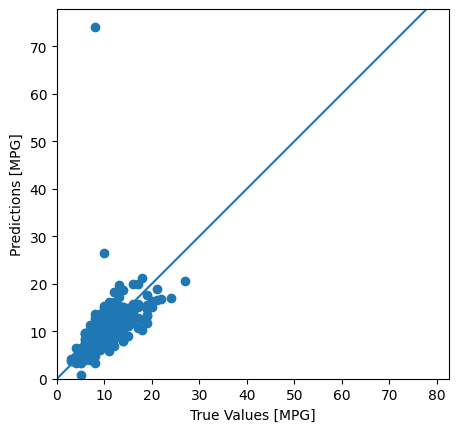

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

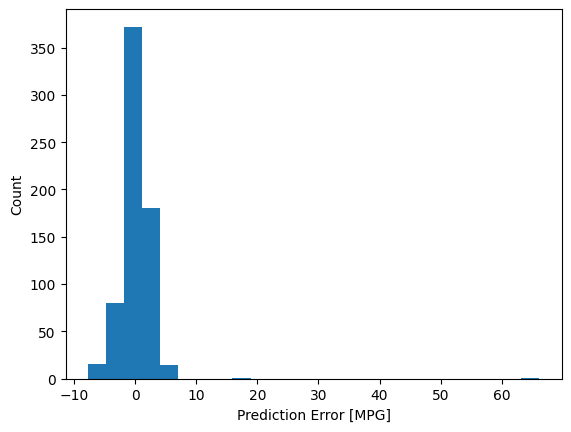

In [19]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")